## 라이브러리 & 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
customer = pd.read_csv('../Data_file/customer.csv')
model_data = pd.read_csv('../Data_file/model.csv')

In [3]:
model_data['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

## 전처리 & 병합

In [4]:
model_data['customer_id'] = model_data['customer_id'].astype(int)
model_data = model_data.drop(columns='Unnamed: 0')

In [5]:
model_data.head()

,customer_id,new_session_id,target,total_amount,shipment_fee,ADD_TO_CART_COUNT,SEARCH_COUNT,ADD_PROMO_COUNT,BOOKING_COUNT,ITEM_DETAIL_COUNT,limit_ship,PAGE_VIEW,total_promo,total_session
0,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,1,4,0,2.0,0.0,1.0,1.0,0.0,1,8,3,3
1,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,3
2,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,0,0,0,2.0,0.0,0.0,0.0,0.0,0,2,0,3
3,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,0,0,0,1.0,0.0,0.0,0.0,0.0,0,1,0,3
4,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,1,1,2,0.0,0.0,0.0,1.0,0.0,3,1,0,3


In [6]:
# 고객데이터에서 필요한 컬럼만 추출
df_cus = customer[['customer_id', 'gender', 'birthdate']]

# 생년월일 데이터 datetime으로 변환
df_cus['birthdate'] = pd.to_datetime(df_cus['birthdate'])

# 나이(age) 계산하기 
current_year = datetime.now().year

df_cus['year_of_birth'] = df_cus['birthdate'].dt.year

df_cus['age'] = current_year - df_cus['year_of_birth']

# 연령 그룹 생성
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['10대 이하', '10대', '20대', '30대', '40대', '50대', '60대']
df_cus['age_group'] = pd.cut(df_cus['age'], bins=bins, labels=labels)


df_cus = df_cus[['customer_id', 'gender', 'birthdate', 'age', 'age_group']]
df_cus

,customer_id,gender,birthdate,age,age_group
0,2870,F,1996-06-14,27,20대
1,8193,F,1993-08-16,30,20대
2,7279,M,1989-01-23,34,30대
3,88813,M,1991-01-05,32,30대
4,82542,M,2000-07-15,23,20대
...,...,...,...,...,...
99995,34743,M,2000-11-17,23,20대
99996,72065,M,1998-03-30,25,20대
99997,32818,F,1993-01-12,30,20대
99998,75597,M,2000-09-13,23,20대


In [7]:
df_cus['age_group'].unique()

['20대', '30대', '10대', '40대', '50대', '10대 이하', '60대']
Categories (7, object): ['10대 이하' < '10대' < '20대' < '30대' < '40대' < '50대' < '60대']

In [8]:
model_data.shape, df_cus.shape

((4345385, 14), (100000, 5))

In [9]:
model_data['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

In [10]:
df_final = pd.merge(model_data, df_cus, on='customer_id', how='left')

In [11]:
df_final['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

In [12]:
df_final.head()

,customer_id,new_session_id,target,total_amount,shipment_fee,ADD_TO_CART_COUNT,SEARCH_COUNT,ADD_PROMO_COUNT,BOOKING_COUNT,ITEM_DETAIL_COUNT,limit_ship,PAGE_VIEW,total_promo,total_session,gender,birthdate,age,age_group
0,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5_7952132,1,4,0,2.0,0.0,1.0,1.0,0.0,1,8,3,3,M,1986-07-12,37,30대
1,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792149,0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,3,M,1986-07-12,37,30대
2,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792150,0,0,0,2.0,0.0,0.0,0.0,0.0,0,2,0,3,M,1986-07-12,37,30대
3,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792151,0,0,0,1.0,0.0,0.0,0.0,0.0,0,1,0,3,M,1986-07-12,37,30대
4,3,36673b2f-940a-42b5-994d-1cce4796b55f_1792152,1,1,2,0.0,0.0,0.0,1.0,0.0,3,1,0,3,M,1986-07-12,37,30대


In [13]:
df_final.isna().sum()

customer_id          0
new_session_id       0
target               0
total_amount         0
shipment_fee         0
ADD_TO_CART_COUNT    0
SEARCH_COUNT         0
ADD_PROMO_COUNT      0
BOOKING_COUNT        0
ITEM_DETAIL_COUNT    0
limit_ship           0
PAGE_VIEW            0
total_promo          0
total_session        0
gender               0
birthdate            0
age                  0
age_group            0
dtype: int64

## 이탈 분석

### 성별 분석

In [14]:
df_final['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

In [15]:
df_final[df_final['customer_id'] == 3]['target'].mean() * 100

15.57632398753894

In [16]:
df_final['customer_id'].nunique()

40389

In [17]:
# 고객별 이탈 세션 수와 전체 세션 수 계산
customer_churn = df_final.groupby('customer_id')['target'].agg(['sum', 'count'])

# 이탈률 계산
customer_churn['churn_rate'] = customer_churn['sum'] / customer_churn['count']

# 이탈률이 높은 순으로 고객 정렬
customer_churn_sorted = customer_churn.sort_values('churn_rate', ascending=False)

# 결과 출력
print(customer_churn_sorted)

             sum  count  churn_rate
customer_id                        
90775          8      8         1.0
15388         10     10         1.0
66332          5      5         1.0
75690          1      1         1.0
88857          4      4         1.0
...          ...    ...         ...
28657          0      5         0.0
72756          0     25         0.0
72717          0     46         0.0
72715          0      1         0.0
9105           0     29         0.0

[40389 rows x 3 columns]


In [18]:
customer_churn_sorted.loc[3]

sum            50.000000
count         321.000000
churn_rate      0.155763
Name: 3, dtype: float64

In [19]:
df_final['target'].mean()

0.2229733383808339

In [20]:
customer_churn_sorted.describe()

,sum,count,churn_rate
count,40389.000000,40389.000000,40389.000000
mean,23.989329,107.588329,0.356455
std,23.469060,130.760721,0.279944
min,0.000000,1.000000,0.000000
25%,7.000000,20.000000,0.175084
50%,17.000000,58.000000,0.242798
75%,34.000000,143.000000,0.439024
max,192.000000,1330.000000,1.000000


In [21]:
# 이탈률이 높은 고객의 성별 비율 계산
high_churn_customers = customer_churn_sorted[customer_churn_sorted['churn_rate'] > 0.35].index
high_churn_gender_ratio = df_final[df_final['customer_id'].isin(high_churn_customers)].groupby('customer_id')['gender'].first().value_counts(normalize=True)


# 결과 출력
print(high_churn_gender_ratio)

gender
F    0.640447
M    0.359553
Name: proportion, dtype: float64


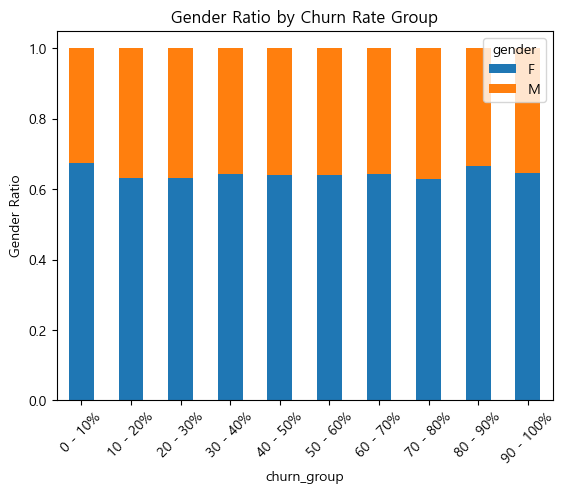

In [22]:
# 이탈율에 따라 고객을 분류
bins = np.linspace(-0.01, 1, 11)  # 이탈률 그룹의 경계값, 시작점 -0.01로 설정
labels = [f'{i * 10} - {(i + 1) * 10}%' for i in range(10)]  # 각 그룹의 레이블
labels[-1] = '90 - 100%'  # 마지막 구간 레이블을 '90 - 100%'로 설정
customer_churn_sorted['churn_group'] = pd.cut(customer_churn_sorted['churn_rate'], bins=bins, labels=labels)




# 각 그룹에서의 성별 비율 계산
gender_ratio_by_churn_group = df_final.groupby(['customer_id', 'gender']).size().unstack().fillna(0)
gender_ratio_by_churn_group['churn_group'] = customer_churn_sorted['churn_group']
gender_ratio_by_churn_group = gender_ratio_by_churn_group.groupby('churn_group').sum()
gender_ratio_by_churn_group = gender_ratio_by_churn_group.div(gender_ratio_by_churn_group.sum(axis=1), axis=0)

# 막대그래프로 시각화
gender_ratio_by_churn_group.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('Gender Ratio')
plt.title('Gender Ratio by Churn Rate Group')
plt.show()

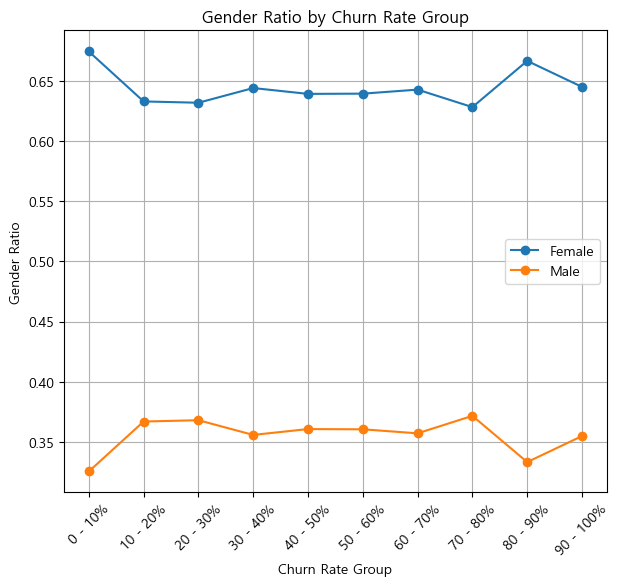

In [23]:
import matplotlib.pyplot as plt

# 각 성별에 대해 이탈률 그룹별 비율을 계산합니다.
gender_ratio_by_churn_group['F_ratio'] = gender_ratio_by_churn_group['F'] / (gender_ratio_by_churn_group['F'] + gender_ratio_by_churn_group['M'])
gender_ratio_by_churn_group['M_ratio'] = gender_ratio_by_churn_group['M'] / (gender_ratio_by_churn_group['F'] + gender_ratio_by_churn_group['M'])

# 성별 비율을 선 그래프로 그립니다.
plt.figure(figsize=(7,6))
plt.plot(gender_ratio_by_churn_group.index, gender_ratio_by_churn_group['F_ratio'], marker='o', label='Female')
plt.plot(gender_ratio_by_churn_group.index, gender_ratio_by_churn_group['M_ratio'], marker='o', label='Male')
plt.xlabel('Churn Rate Group')
plt.xticks(rotation=45)
plt.ylabel('Gender Ratio')
plt.title('Gender Ratio by Churn Rate Group')
plt.legend()
plt.grid(True)
plt.show()

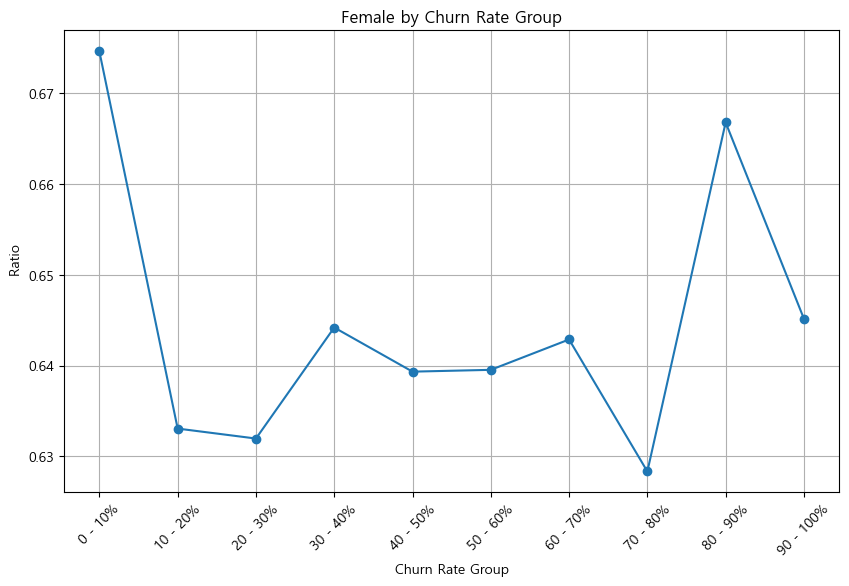

In [24]:
# 각 성별에 대해 이탈률 그룹별 비율을 계산합니다.
gender_ratio_by_churn_group['F_ratio'] = gender_ratio_by_churn_group['F'] / (gender_ratio_by_churn_group['F'] + gender_ratio_by_churn_group['M'])

# 성별 비율을 선 그래프로 그립니다.
plt.figure(figsize=(10,6))
plt.plot(gender_ratio_by_churn_group.index, gender_ratio_by_churn_group['F_ratio'], marker='o', label='Female')
plt.xticks(rotation=45)
plt.xlabel('Churn Rate Group')
plt.ylabel(' Ratio')
plt.title('Female by Churn Rate Group')
plt.grid(True)
plt.show()

### 연령대 분석

In [25]:
# 이탈률이 높은 고객 ID 리스트
high_churn_customers = customer_churn_sorted[customer_churn_sorted['churn_rate'] > 0.5].index

# 이탈률이 높은 고객들의 데이터만 선택
high_churn_df = df_final[df_final['customer_id'].isin(high_churn_customers)]

# 이탈률이 높은 고객들의 나이 분포 확인
age_distribution = high_churn_df['age'].value_counts().sort_index()
print(age_distribution)

# 이탈률이 높은 고객들의 연령대 분포 확인
age_group_distribution = high_churn_df['age_group'].value_counts().sort_index()
print(age_group_distribution)

age
9        19
10      121
11      206
12      360
13      629
14     1273
15     1433
16     2207
17     3778
18     4871
19     6250
20     7044
21     8054
22     7638
23     8685
24    10385
25    11192
26     8978
27     9827
28     8720
29     9478
30     8713
31     6830
32     7203
33     6412
34     4997
35     4903
36     4576
37     3630
38     2411
39     2983
40     2055
41     1948
42     1190
43     1651
44      868
45      741
46      808
47      691
48      549
49      343
50      206
51      131
52      127
53       82
54       89
55       42
56       36
59       19
60       26
61        3
Name: count, dtype: int64
age_group
10대 이하      140
10대       28051
20대       91670
30대       46000
40대        8995
50대         552
60대           3
Name: count, dtype: int64


In [26]:
# 이탈률이 높은 고객들의 데이터 중 중복된 고객 ID를 제거
unique_high_churn_df = high_churn_df.drop_duplicates(subset=['customer_id', 'age', 'age_group'])

# 이탈률이 높은 고객들의 나이 분포 확인
age_distribution = unique_high_churn_df['age'].value_counts().sort_index()
print(age_distribution)

# 이탈률이 높은 고객들의 연령대 분포 확인
age_group_distribution = unique_high_churn_df['age_group'].value_counts().sort_index()
print(age_group_distribution)

age
9       1
10      4
11     10
12     22
13     39
14     63
15     72
16    119
17    186
18    232
19    309
20    337
21    404
22    390
23    411
24    479
25    528
26    432
27    474
28    438
29    434
30    385
31    332
32    346
33    305
34    249
35    236
36    205
37    176
38    140
39    139
40    104
41     97
42     54
43     61
44     42
45     41
46     37
47     29
48     21
49     13
50      9
51      9
52      8
53      3
54      5
55      4
56      2
59      1
60      2
61      1
Name: count, dtype: int64
age_group
10대 이하       5
10대       1389
20대       4375
30대       2232
40대        404
50대         34
60대          1
Name: count, dtype: int64


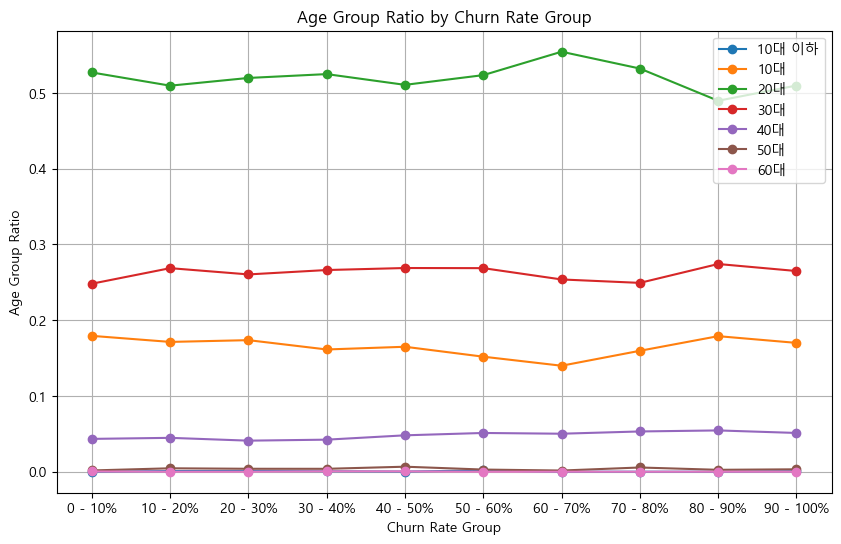

In [27]:
# 각 그룹에서의 연령대 비율 계산
age_group_ratio_by_churn_group = df_final.groupby(['customer_id', 'age_group']).size().unstack().fillna(0)
age_group_ratio_by_churn_group['churn_group'] = customer_churn_sorted['churn_group']
age_group_ratio_by_churn_group = age_group_ratio_by_churn_group.groupby('churn_group').sum()
age_group_ratio_by_churn_group = age_group_ratio_by_churn_group.div(age_group_ratio_by_churn_group.sum(axis=1), axis=0)

# 연령대 비율을 선 그래프로 그립니다.
plt.figure(figsize=(10,6))

for age_group in age_group_ratio_by_churn_group.columns:
    if age_group != 'churn_group':
        plt.plot(age_group_ratio_by_churn_group.index, age_group_ratio_by_churn_group[age_group], marker='o', label=age_group)

plt.xlabel('Churn Rate Group')
plt.ylabel('Age Group Ratio')
plt.title('Age Group Ratio by Churn Rate Group')
plt.legend(loc='best')
plt.grid(True)
plt.show()

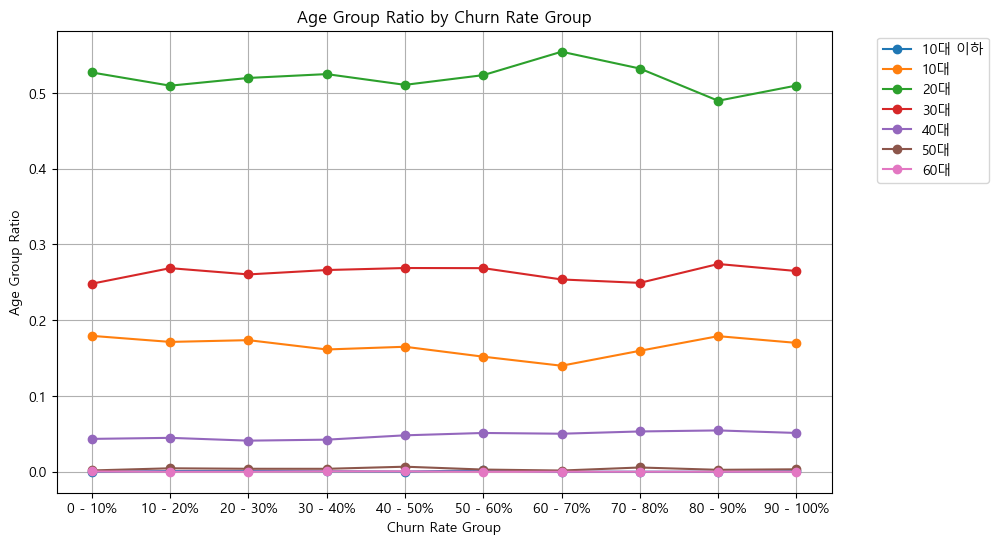

In [28]:
plt.figure(figsize=(10,6))

for age_group in age_group_ratio_by_churn_group.columns:
    if age_group != 'churn_group':
        plt.plot(age_group_ratio_by_churn_group.index, age_group_ratio_by_churn_group[age_group], marker='o', label=age_group)

plt.xlabel('Churn Rate Group')
plt.ylabel('Age Group Ratio')
plt.title('Age Group Ratio by Churn Rate Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 그래프 밖으로 이동
plt.grid(True)
plt.show()

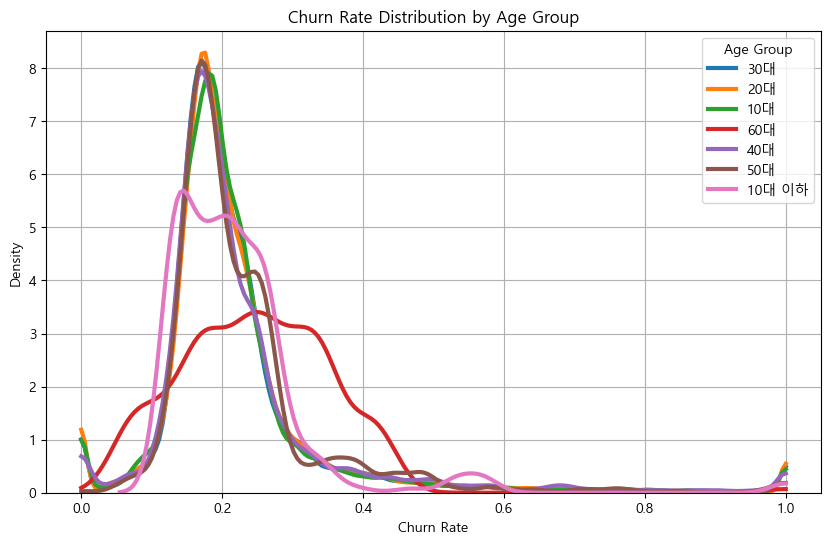

In [29]:
import seaborn as sns

# 각 연령대에서의 이탈률을 구하기 위해 원본 데이터와 고객별 이탈률을 병합합니다.
df_final_with_churn_rate = df_final.merge(customer_churn_sorted['churn_rate'], left_on='customer_id', right_index=True)

# 연령대 그룹을 반복하면서 각 그룹의 이탈률 분포를 시각화합니다.
plt.figure(figsize=(10,6))
for age_group in df_final['age_group'].unique():
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    sns.distplot(subset['churn_rate'], hist = False, kde = True, kde_kws = {'linewidth': 3, 'clip': (0.0, 1.0)}, label = age_group)


plt.xlabel('Churn Rate')
plt.ylabel('Density')
plt.title('Churn Rate Distribution by Age Group')
plt.legend(title = 'Age Group')
plt.grid(True)
plt.show()

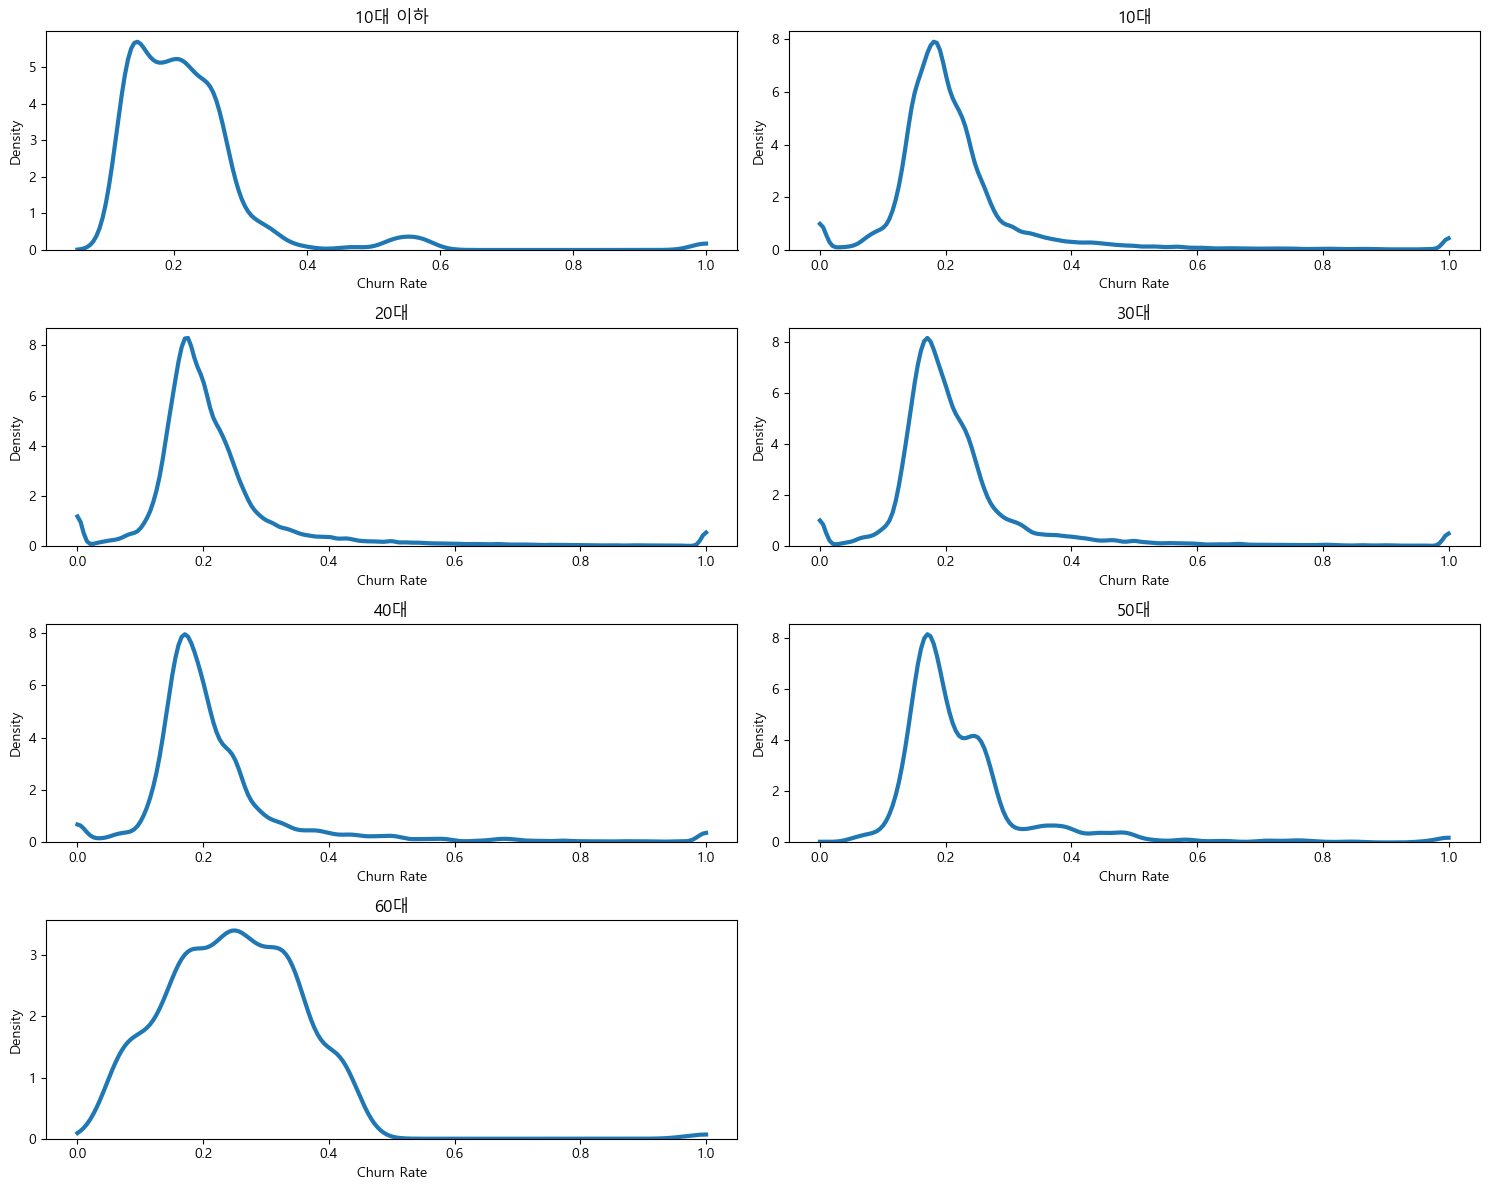

In [35]:
# 연령 그룹의 개수를 구하고, 이를 바탕으로 subplot의 row와 column을 설정합니다.
n_age_groups = df_final['age_group'].nunique()
n_cols = 2
n_rows = n_age_groups // n_cols
n_rows += n_age_groups % n_cols

pos = range(1, n_age_groups + 1)

plt.figure(figsize=(15, 3 * n_rows))

for i, age_group in enumerate(df_final['age_group'].sort_values().unique()):
    plt.subplot(n_rows, n_cols, pos[i])
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    sns.distplot(subset['churn_rate'], hist=False, kde=True, 
                 kde_kws={'linewidth': 3, 'clip': (0.0, 1.0)})
    plt.title(age_group)
    plt.xlabel('Churn Rate')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [30]:
# 각 연령대에서의 평균 이탈률 계산
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean()

print(average_churn_rate_by_age_group)

age_group
10대 이하    0.220371
10대       0.220547
20대       0.223496
30대       0.222795
40대       0.226699
50대       0.230211
60대       0.248619
Name: churn_rate, dtype: float64


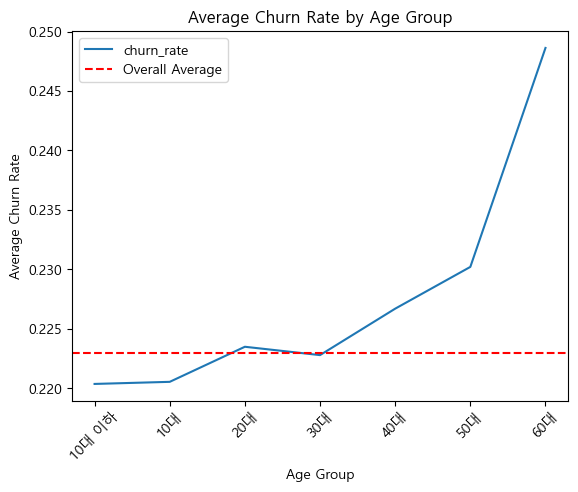

In [31]:
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean()

# 전체 평균 이탈률 계산
overall_average_churn_rate = df_final_with_churn_rate['churn_rate'].mean()

# 평균 이탈률을 그래프로 그립니다.
average_churn_rate_by_age_group.plot(kind='line')
plt.xticks(rotation=45)

# 전체 평균 이탈률 선 추가
plt.axhline(y=overall_average_churn_rate, color='r', linestyle='--', label='Overall Average')

plt.xlabel('Age Group')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Age Group')
plt.legend()
plt.show()

In [32]:
overall_average_churn_rate

0.22297333838083383

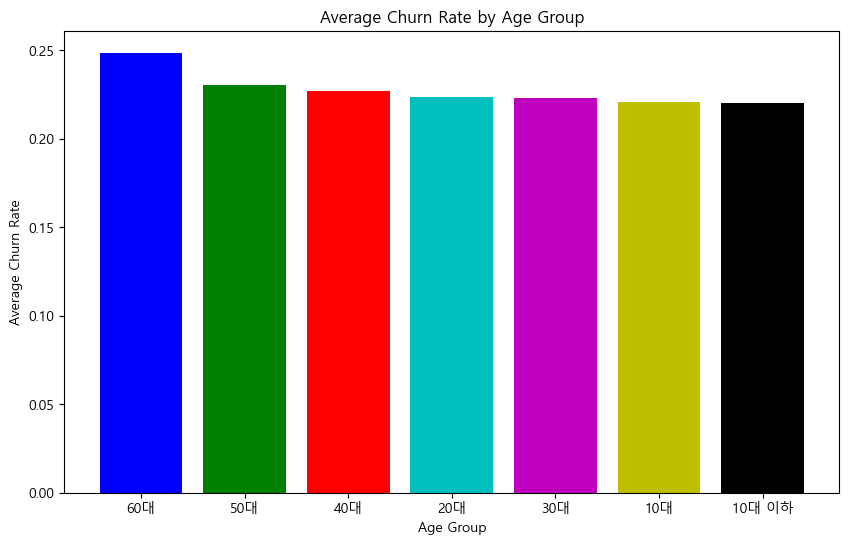

In [33]:
# 각 연령대에서의 평균 이탈률 계산
average_churn_rate_by_age_group = df_final_with_churn_rate.groupby('age_group')['churn_rate'].mean().sort_values(ascending=False)

# 색상 리스트 생성 (색상 수는 연령 그룹 수와 일치해야 합니다.)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10,6))

# 각 연령 그룹에 대해 막대 그래프 그리기
for i, age_group in enumerate(average_churn_rate_by_age_group.index):
    plt.bar(age_group, average_churn_rate_by_age_group[age_group], color=colors[i])

plt.xlabel('Age Group')
plt.ylabel('Average Churn Rate')
plt.title('Average Churn Rate by Age Group')
plt.show()

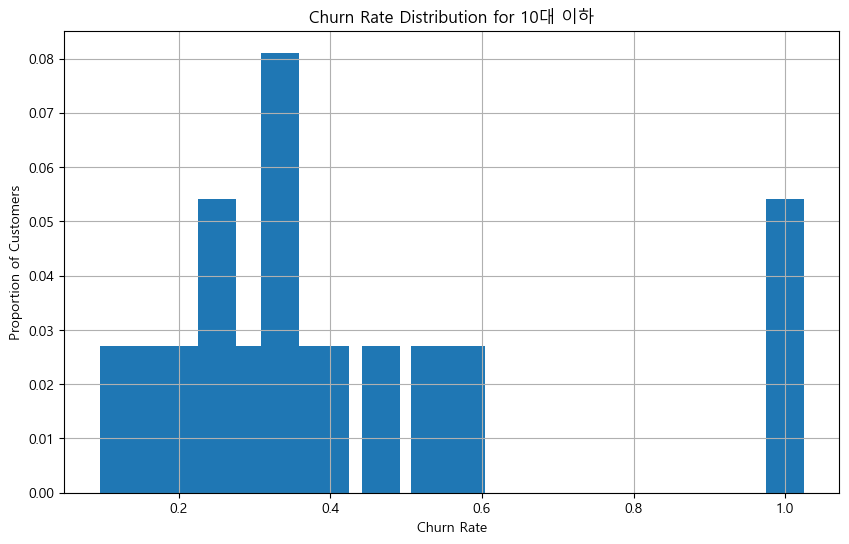

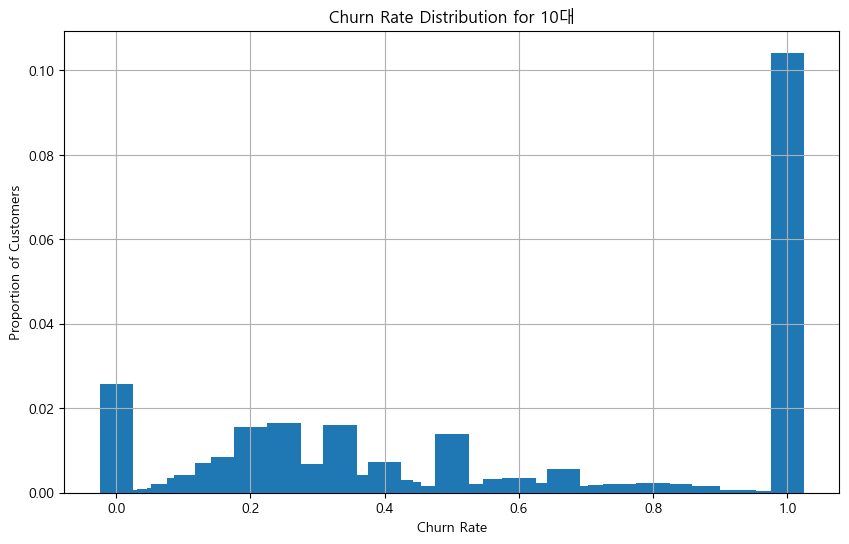

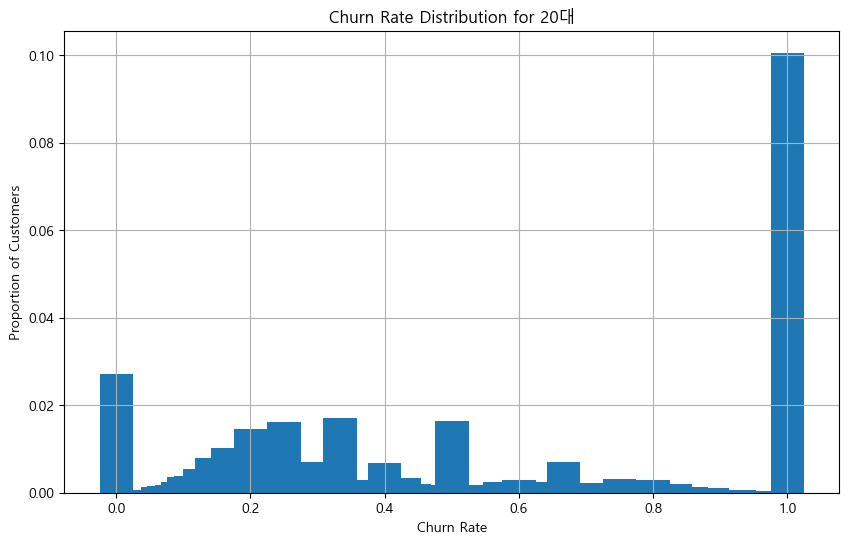

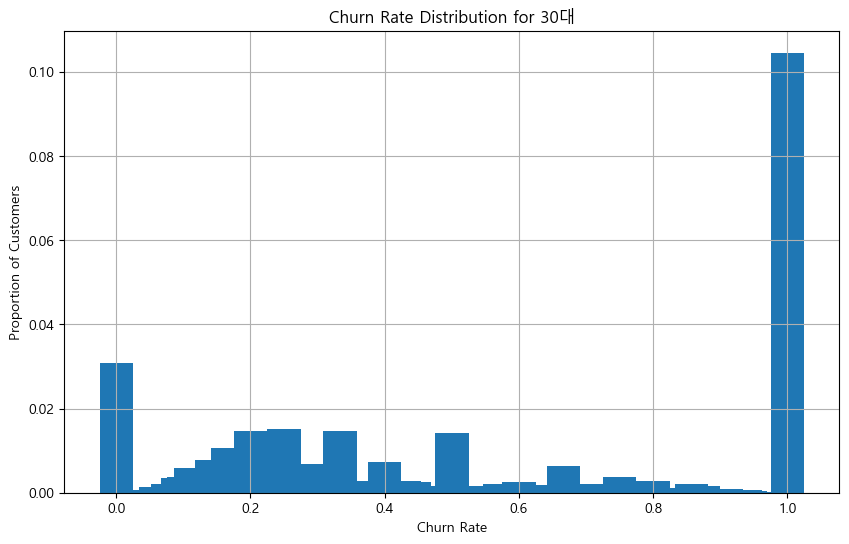

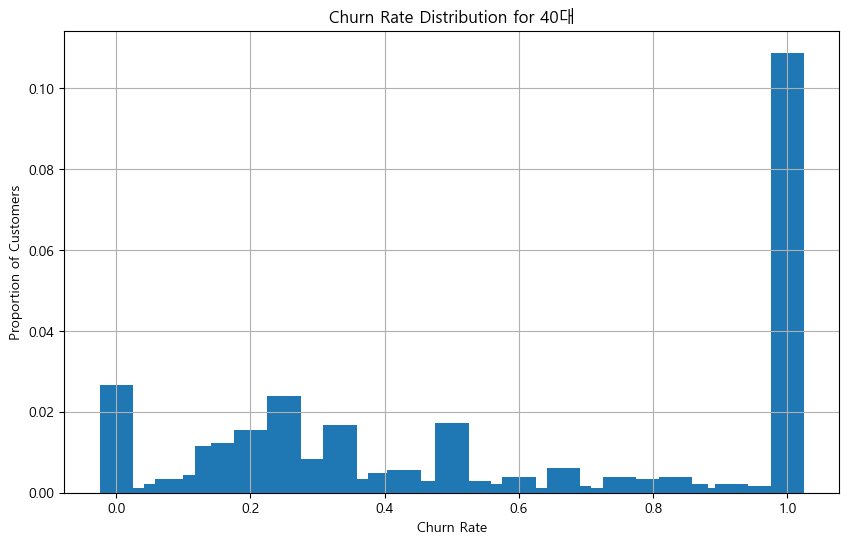

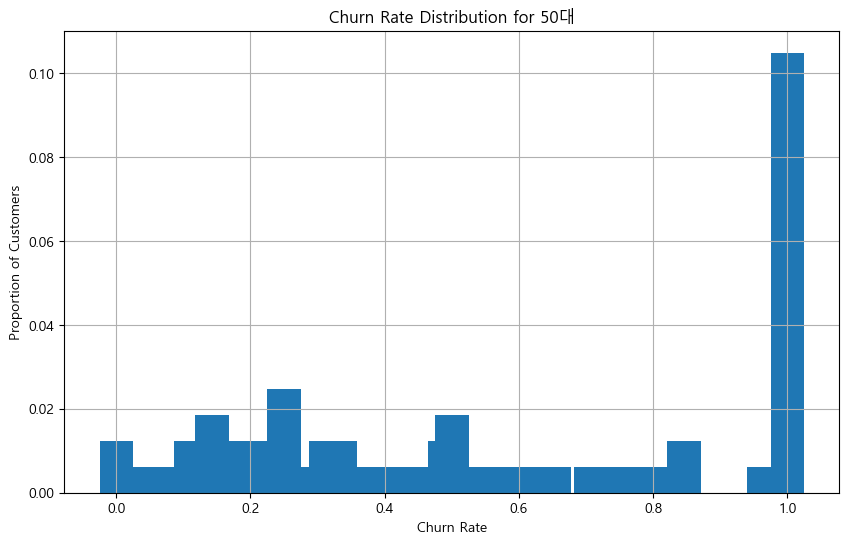

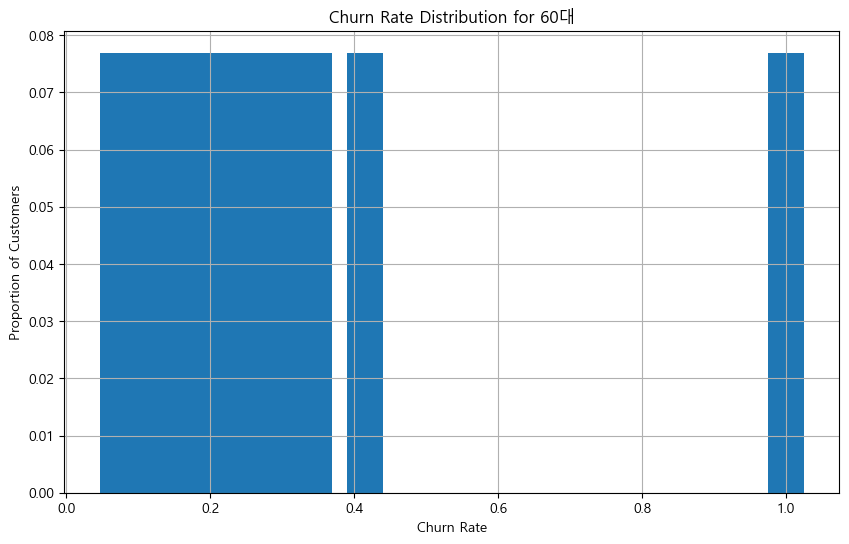

In [34]:
# 연령대 그룹을 반복하면서 각 그룹의 이탈률 분포를 시각화합니다.
for age_group in df_final['age_group'].sort_values().unique():
    subset = df_final_with_churn_rate[df_final_with_churn_rate['age_group'] == age_group]
    
    # 각 이탈률에 해당하는 유니크한 고객 수를 계산합니다.
    churn_rate_counts = subset.groupby('churn_rate')['customer_id'].nunique()

    # 각 그룹의 전체 고객 수를 계산합니다.
    total_customers = subset['customer_id'].nunique()

    # 고객 수의 비율을 계산하여 히스토그램을 그립니다.
    plt.figure(figsize=(10,6))
    plt.bar(churn_rate_counts.index, churn_rate_counts / total_customers, width=0.05)
    
    plt.title(f'Churn Rate Distribution for {age_group}')
    plt.xlabel('Churn Rate')
    plt.ylabel('Proportion of Customers')
    plt.grid(True)
    plt.show()